Agglomerative Hierarchical

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

iris_df = datasets.load_iris()

In [5]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_hier = cluster.fit_predict(iris_df.data)

print(y_hier)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


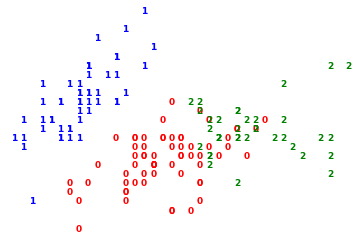

In [15]:
#Visualising the clusters
#plt.scatter(iris_df.data[y_hier == 0, 0], iris_df.data[y_hier == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
#plt.scatter(iris_df.data[y_hier == 1, 0], iris_df.data[y_hier == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
#plt.scatter(iris_df.data[y_hier == 2, 0], iris_df.data[y_hier == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#plt.legend()
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(iris_df.data)

colours = 'rbg'
for i in range(iris_df.data.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(cluster.labels_[i]),
             color=colours[y_hier[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

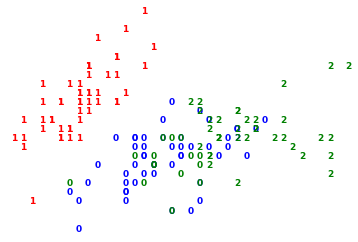

In [14]:
colours = 'rbg'
for i in range(iris_df.data.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(cluster.labels_[i]),
             color=colours[iris_df.target[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

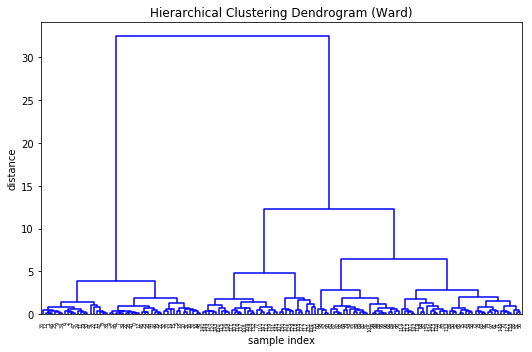

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(iris_df.data, 'ward')

figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

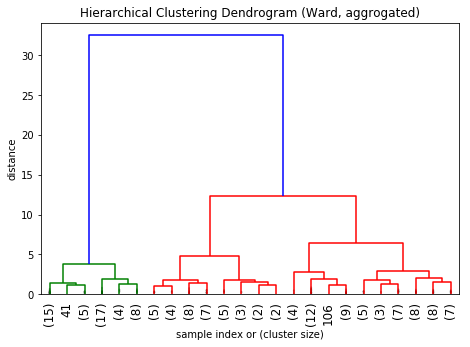

In [17]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()